In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
print("Class names and their indices:", list(enumerate(train_ds.class_names)))


Class names and their indices: [(0, 'cats'), (1, 'dogs')]


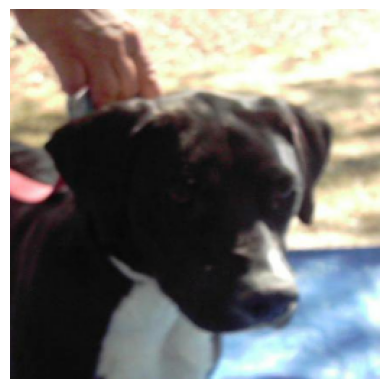

In [7]:
import matplotlib.pyplot as plt

# Take one batch from the dataset
for images, labels in train_ds.take(1):
    # Display any image in the batch
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.axis('off')
    plt.show()
    break  # Only show the first image


In [8]:
for images, labels in train_ds.take(1):  # Taking just one batch from the dataset
    print(images[10].numpy())  # Print the numpy array of any image
    break

[[[ 50.       110.       162.      ]
  [ 53.847656 110.84766  163.84766 ]
  [ 56.373047 113.37305  166.37305 ]
  ...
  [ 52.815987  53.815987  47.815987]
  [ 69.88612   68.581436  61.157604]
  [ 84.048744  81.048744  72.048744]]

 [[ 50.       110.       162.      ]
  [ 53.847656 110.84766  163.84766 ]
  [ 56.373047 113.37305  166.37305 ]
  ...
  [ 46.267014  47.267014  41.267014]
  [ 57.923073  56.618385  49.194557]
  [ 66.24083   63.240833  54.240833]]

 [[ 50.       110.       162.      ]
  [ 53.847656 110.84766  163.84766 ]
  [ 56.373047 113.37305  166.37305 ]
  ...
  [ 53.771194  54.771194  48.771194]
  [ 51.93841   50.633724  43.209896]
  [ 47.685474  44.685474  35.685474]]

 ...

 [[124.57973  115.57973  108.57973 ]
  [126.66441  117.66441  110.66441 ]
  [129.51584  122.51584  112.51584 ]
  ...
  [106.8925   111.8925   104.8925  ]
  [108.67682  114.25299  105.524475]
  [105.073456 111.073456 101.073456]]

 [[117.539314 108.539314 101.539314]
  [121.07542  112.07542  105.07542 ]


In [9]:
#normalize
def process (image,label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train = train_ds.map(process)
validation = validation_ds.map(process)

In [10]:
for images, labels in train.take(1):  # Taking just one batch from the dataset
    normalized_image = images[10].numpy()  # Get the numpy array of the first image
    print(normalized_image)  # Print the array values of the normalized image
    break  # Only process the first batch


[[[0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  ...
  [0.2791973  0.36139706 0.38131127]
  [0.29776347 0.37619486 0.40364584]
  [0.28627452 0.3647059  0.39215687]]

 [[0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  ...
  [0.28899884 0.3711986  0.3911128 ]
  [0.30369106 0.38212246 0.40957344]
  [0.29025736 0.36868873 0.3961397 ]]

 [[0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  [0.13725491 0.14509805 0.19607843]
  ...
  [0.3012348  0.3834346  0.4033488 ]
  [0.31012443 0.3885558  0.41600677]
  [0.29411766 0.37254903 0.4       ]]

 ...

 [[0.12478554 0.45349264 0.35153186]
  [0.11712623 0.44583333 0.34387255]
  [0.10872851 0.43811274 0.33615196]
  ...
  [0.7675863  0.9310085  0.97628105]
  [0.7330174  0.8995309  0.93552965]
  [0.6738971  0.84041053 0.8764093 ]]

 [[0.12935048 0.45876226 0.35680148]
  [0.11980627 0.44921803 0.34725726]


In [11]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))

model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation ='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'] )

In [14]:
history = model.fit(train, epochs = 11, validation_data = validation )

Epoch 1/11
625/625 [==============================] - 79s 111ms/step - loss: 1.1765 - accuracy: 0.6061 - val_loss: 0.7164 - val_accuracy: 0.6246
Epoch 2/11
625/625 [==============================] - 68s 108ms/step - loss: 0.5517 - accuracy: 0.7189 - val_loss: 0.5528 - val_accuracy: 0.7182
Epoch 3/11
625/625 [==============================] - 66s 106ms/step - loss: 0.4981 - accuracy: 0.7606 - val_loss: 0.5154 - val_accuracy: 0.7362
Epoch 4/11
625/625 [==============================] - 68s 109ms/step - loss: 0.4276 - accuracy: 0.8056 - val_loss: 0.4306 - val_accuracy: 0.8022
Epoch 5/11
625/625 [==============================] - 68s 108ms/step - loss: 0.3555 - accuracy: 0.8436 - val_loss: 0.4224 - val_accuracy: 0.8160
Epoch 6/11
625/625 [==============================] - 65s 104ms/step - loss: 0.2853 - accuracy: 0.8810 - val_loss: 0.4670 - val_accuracy: 0.7910
Epoch 7/11
625/625 [==============================] - 68s 108ms/step - loss: 0.2129 - accuracy: 0.9146 - val_loss: 0.7531 - val_ac

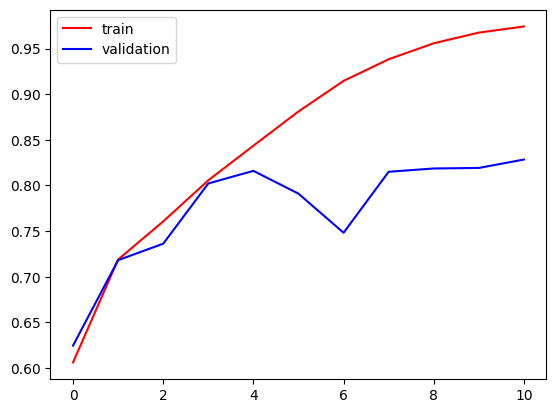

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color ='blue', label = 'validation')
plt.legend()
plt.show()

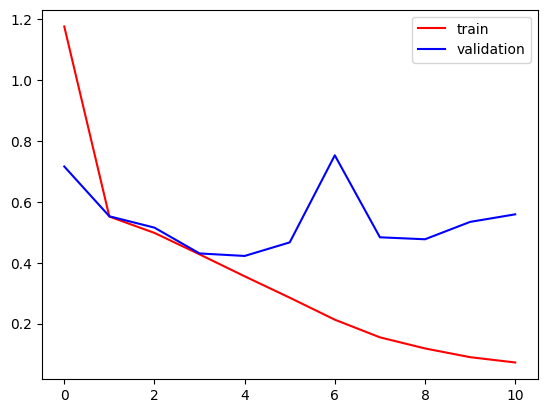

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color ='red', label = 'train')
plt.plot(history.history['val_loss'], color ='blue', label = 'validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [27]:
import cv2

In [28]:
test_img = cv2.imread('/content/pexels-pixabay-45201.jpg')

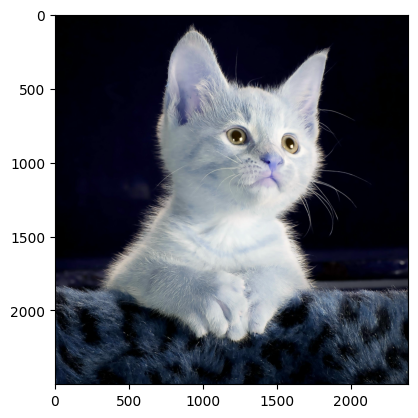

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(2500, 2392, 3)

In [31]:
test_img = cv2.resize(test_img, (256, 256))

In [32]:
test_input = test_img.reshape((1,256, 256, 3))

In [33]:
prediction = model.predict(test_input)
if prediction == 0:
    print("It is a cat.")
else:
    print("It is a dog.")


1/1 [==============================] - 0s 25ms/step
It is a cat.
